##### Libraries and GPU

In [2]:
                                    ####### VISUALIZATION TOOLS #######

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colormaps as cm
import matplotlib.patches as mpatches 
from matplotlib.patches import Patch

import seaborn as sns
import warnings #ignore the errors for newer version of distplot
warnings.filterwarnings("ignore", category=UserWarning) 

import plotly.express as px
import plotly.graph_objects as go

import folium
from folium import plugins
from folium import Choropleth


                                    ####### VECTORS AND MATRICES #######

import numpy as np
import pandas as pd

                                    ####### SCIPY #######

from scipy import stats

                                    ####### SCIKIT-LEARN #######

from sklearn.preprocessing import StandardScaler #for Z-score normalization
from sklearn.preprocessing import normalize  #normalization along rows
from sklearn.preprocessing import PolynomialFeatures #to do a polynomial regression
from sklearn.preprocessing import OneHotEncoder #one-hot encoding adding columns
from sklearn.preprocessing import LabelEncoder #from strings to label
from sklearn.preprocessing import label_binarize #one-hot encoding of vectors

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
from sklearn.linear_model import Ridge #for Ridge regression
from sklearn.linear_model import Lasso #for Lasso regression
from sklearn.linear_model import LogisticRegression #logistic regression 


from sklearn.tree import DecisionTreeClassifier #for tree classifier (not regression)
from sklearn.tree import DecisionTreeRegressor #for regression tree
from sklearn.tree import plot_tree #to plot the tree

from sklearn.svm import LinearSVC #supported vector machine
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.cluster import KMeans #Kmeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
from sklearn.metrics import log_loss # for the cross-correlation entropy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score # k-means accuracies
from sklearn.metrics import explained_variance_score #for explained variance

from sklearn.pipeline import Pipeline #to use pipelines

from sklearn.model_selection import train_test_split #train-test splitting
from sklearn.model_selection import cross_val_score #K-fold validation
from sklearn.model_selection import cross_val_predict #K-fold validation
from sklearn.model_selection import StratifiedKFold #K-fold validation
from sklearn.model_selection import GridSearchCV #for GridSearchCV


from sklearn.multiclass import OneVsOneClassifier #multiclass classification using binary classification instead

from sklearn.utils.class_weight import compute_sample_weight

from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

#import umap.umap_ as UMAP 
from sklearn.manifold import TSNE


from sklearn.datasets import make_blobs 
from sklearn.datasets import make_classification

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.datasets import load_breast_cancer
cancers = load_breast_cancer()
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing


                                    ####### ENSAMBLE METHODS #######

from xgboost import XGBRegressor

                                    ####### PYTORCH #######
import torch
from torch import nn #train neural networks
from torch import optim #optimizer
import torch.nn.functional as functional
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.utils import make_grid #to plot multiple images
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms # data transformation
import albumentations as albuments # data augmentation
from torchvision import datasets
from torch.utils.data import Subset
import torchvision.models as models

from torchsummary import summary

import timm # PyTorch Image Models (timm) is a collection of image models, layers, utilities, optimizers, schedulers, data-loaders / augmentations, and reference training / validation scripts that aim to pull together a wide variety of SOTA models with ability to reproduce ImageNet training results.


                                   ####### IMAGES #######
                                   
import os
from PIL import Image # converting images into arrays
from PIL import ImageFile

from copy import copy
import operator
import sys

import cv2

                                   ####### SCRAPING #######
import urllib
import requests
import io
from io import StringIO
from bs4 import BeautifulSoup #text/HTML
from PIL import Image
from IPython.display import display, IFrame #APPLICATION/PDF
import json #JSON
import xml.etree.ElementTree as ET #XML



import gymnasium
from gymnasium.wrappers import RecordVideo
import glob, io, base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import random
import wordcloud
from wordcloud import WordCloud, STOPWORDS

from collections import namedtuple, deque

import time #time of running
from tqdm.notebook import tqdm #to show advancement bars
import datetime 

import re
import unicodedata

import shutil
from pathlib import Path

In [3]:
import sys, subprocess

subprocess.check_call([
    sys.executable,            # l’interprete Python corrente
    "-m", "pip", "install",    # chiama pip come modulo
    "-U",                      # upgrade se già presente
    "0"
])

0

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Which device we are on: {}".format(device))

Which device we are on: cpu


In [3]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

print("Which device we are on: {}".format(device))

Which device we are on: mps


# Generative Adversarial Network scheme

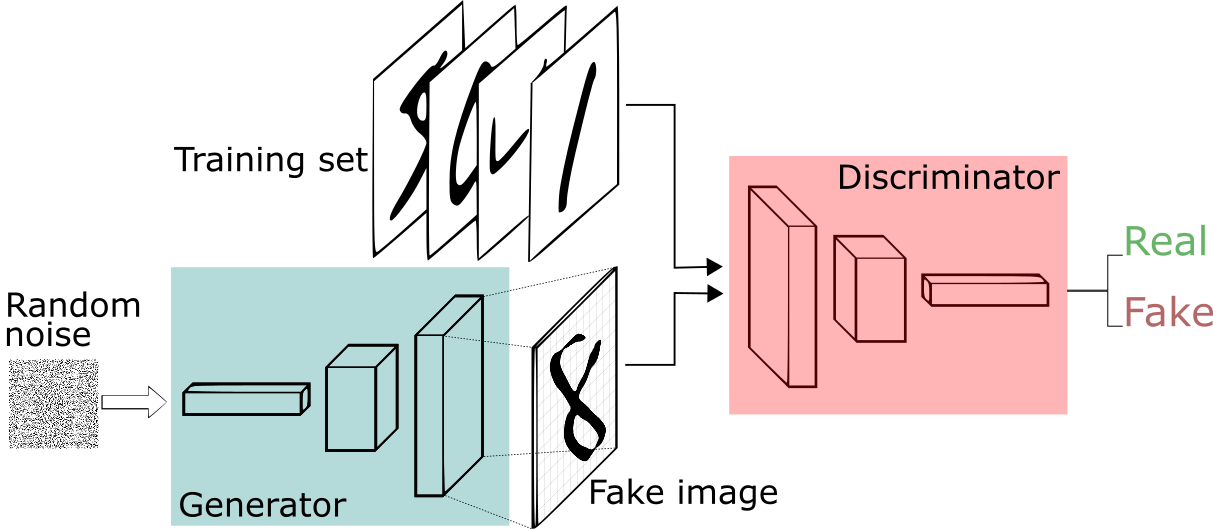

# Parameters

In [4]:
batch_size = 128

noise_dim = 64

lr = 0.0002
beta_1 = 0.5 #for Adam optimizer
beta_2 = 0.99 #for Adam optimizer

epochs = 20

# Load MNIST Dataset and batches

In [ ]:
train_trans = transforms.Compose([
                    transforms.RandomRotation((-20,20)),
                    transforms.ToTensor()
])

train_dataset = datasets.MNIST('./mnist/', train=True, download=True,
                             transform=train_trans)

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

print(f'There are {len(train_dataset)} images in the train set, and with bacthes of dimension {batch_size}, there is a total number',
                        f'of {len(train_loader)} bathces.')

100%|██████████| 9.91M/9.91M [00:07<00:00, 1.26MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 184kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.01MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 610kB/s]

: 

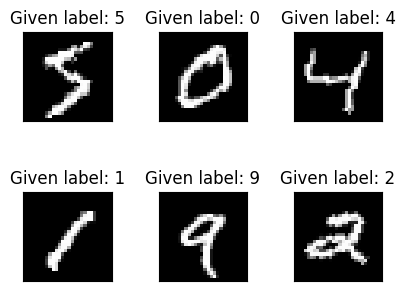

In [ ]:
fig = plt.figure(figsize=(4,4))

for i in range(6):
    image, label = train_dataset[i]  # train_dataset[i] gives (transformed image, original label)
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(image.squeeze(), cmap='gray', interpolation='none')
    plt.title("Given label: {}".format(int(label)))
    plt.xticks([])
    plt.yticks([])

plt.show()

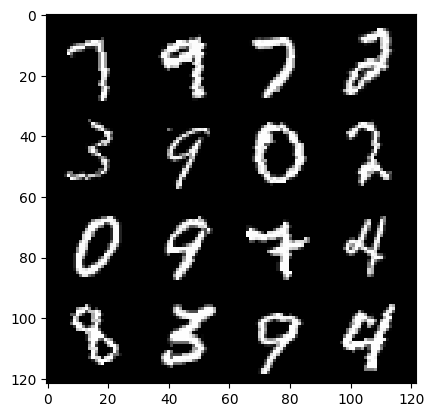

In [ ]:
dataiter = iter(train_loader)
image, _ = next(dataiter)

def show_tensor_images(tensor_img, num_images = 16, size=(1, 28, 28)):
    unflat_img = tensor_img.detach().cpu()
    img_grid = make_grid(unflat_img[:num_images], nrow=4)
    plt.imshow(img_grid.permute(1, 2, 0).squeeze())
    plt.show()

show_tensor_images(image, num_images = 16, size=(1, 28, 28))

# Create Discriminator Network

This part of the GAN is a binary classificator which tells us if an image is real or fake. The scheme will be:

In [ ]:
'''

Network : Discriminator

input : (bs, 1, 28, 28)
      |                                                                                               ---- SUMMARY ----
      V
Conv2d( in_channels = 1, out_channels = 16, kernel_size = (3,3), stride = 2)                           #(bs, 16, 13, 13)
BatchNorm2d()                                                                                          #(bs, 16, 13, 13)
LeakyReLU()                                                                                            #(bs, 16, 13, 13)
      |
      V
Conv2d( in_channels = 16, out_channels = 32, kernel_size = (5,5), stride = 2)                          #(bs, 32, 5, 5)
BatchNorm2d()                                                                                          #(bs, 32, 5, 5)
LeakyReLU()                                                                                            #(bs, 32, 5, 5)
      |
      V
Conv2d( in_channels = 32, out_channels = 64, kernel_size = (5,5), stride = 2)                          #(bs, 64, 1, 1)
BatchNorm2d()                                                                                          #(bs, 64, 1, 1)
LeakyReLU()                                                                                            #(bs, 64, 1, 1)
      |
      V
Flatten()                                                                                              #(bs, 64)
Linear(in_features = 64, out_features = 1)                                                             #(bs, 1)

'''

'\n\nNetwork : Discriminator\n\ninput : (bs, 1, 28, 28)\n      |                                                                                               ---- SUMMARY ----\n      V\nConv2d( in_channels = 1, out_channels = 16, kernel_size = (3,3), stride = 2)                           #(bs, 16, 13, 13)\nBatchNorm2d()                                                                                          #(bs, 16, 13, 13)\nLeakyReLU()                                                                                            #(bs, 16, 13, 13)\n      |\n      V\nConv2d( in_channels = 16, out_channels = 32, kernel_size = (5,5), stride = 2)                          #(bs, 32, 5, 5)\nBatchNorm2d()                                                                                          #(bs, 32, 5, 5)\nLeakyReLU()                                                                                            #(bs, 32, 5, 5)\n      |\n      V\nConv2d( in_channels = 32, out_channels = 64, kernel

Let's implement it. Since the blocks are very similar, we create a function for them:

In [ ]:
def discriminator_block(in_channels, out_channels, kernel_size, stride):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, stride),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(negative_slope = 0.2) 
    )

class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator, self).__init__()

        self.block_1 = discriminator_block(1, 16, (3,3), 2)
        self.block_2 = discriminator_block(16, 32, (5,5), 2)
        self.block_3 = discriminator_block(32, 64, (5,5), 2)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features = 64, out_features = 1)
        # we will use BCEWithlogits loss, so we do not use sigmoid

    def forward(self,images):
        x = self.block_1(images)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.linear(self.flatten(x))
        # we will use BCEWithlogits loss, so we do not use sigmoid

        return x
    
D = Discriminator().to(device)

Here a summary of the net, with also a counting of the parameters:

In [ ]:
#print(D.parameters)

summary(D.to('cpu'), input_size = (1,28,28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 13, 13]             160
       BatchNorm2d-2           [-1, 16, 13, 13]              32
         LeakyReLU-3           [-1, 16, 13, 13]               0
            Conv2d-4             [-1, 32, 5, 5]          12,832
       BatchNorm2d-5             [-1, 32, 5, 5]              64
         LeakyReLU-6             [-1, 32, 5, 5]               0
            Conv2d-7             [-1, 64, 1, 1]          51,264
       BatchNorm2d-8             [-1, 64, 1, 1]             128
         LeakyReLU-9             [-1, 64, 1, 1]               0
          Flatten-10                   [-1, 64]               0
           Linear-11                    [-1, 1]              65
Total params: 64,545
Trainable params: 64,545
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

# Create Generator Network

Here we create a generator of realistic-fake images from a random noise: starting from (bs,z_dim) we arrive to a image (bs, 1, 28, 28).

In [ ]:
'''

Network : Generator

z_dim = 64
input : (bs,z_dim)

      |
      | Reshape
      V

input : (bs, channel, height, width) -> (bs, z_dim , 1 , 1)
      |                                                                                               ---- SUMMARY ----
      V
ConvTranspose2d( in_channels = z_dim, out_channels = 256, kernel_size = (3,3), stride = 2)             #(bs, 256, 3, 3)
BatchNorm2d()                                                                                          #(bs, 256, 3, 3)
ReLU()                                                                                                 #(bs, 256, 3, 3)
      |
      V
ConvTranspose2d( in_channels = 256, out_channels = 128, kernel_size = (4,4), stride = 1)               #(bs, 128, 6, 6)
BatchNorm2d()                                                                                          #(bs, 128, 6, 6)
ReLU()                                                                                                 #(bs, 128, 6, 6)
      |
      V
ConvTranspose2d( in_channels = 128, out_channels = 64, kernel_size = (3,3), stride = 2)                #(bs, 64, 13, 13)
BatchNorm2d()                                                                                          #(bs, 64, 13, 13)
ReLU()                                                                                                 #(bs, 64, 13, 13)
      |
      V
ConvTranspose2d( in_channels = 64, out_channels = 1, kernel_size = (4,4), stride = 2)                  #(bs, 1, 28, 28)
Tanh()                                                                                                 #(bs, 1, 28, 28)

'''

'\n\nNetwork : Generator\n\nz_dim = 64\ninput : (bs,z_dim)\n\n      |\n      | Reshape\n      V\n\ninput : (bs, channel, height, width) -> (bs, z_dim , 1 , 1)\n      |                                                                                               ---- SUMMARY ----\n      V\nConvTranspose2d( in_channels = z_dim, out_channels = 256, kernel_size = (3,3), stride = 2)             #(bs, 256, 3, 3)\nBatchNorm2d()                                                                                          #(bs, 256, 3, 3)\nReLU()                                                                                                 #(bs, 256, 3, 3)\n      |\n      V\nConvTranspose2d( in_channels = 256, out_channels = 128, kernel_size = (4,4), stride = 1)               #(bs, 128, 6, 6)\nBatchNorm2d()                                                                                          #(bs, 128, 6, 6)\nReLU()                                                                                 

In [ ]:
def generator_block(in_channels, out_channels, kernel_size, stride):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()
    )

class Generator(nn.Module):
    
    def __init__(self, noise_dim):
        super(Generator, self).__init__()

        self.noise_dim = noise_dim
        self.block_1 = generator_block(noise_dim, 256, (3,3), 2)
        self.block_2 = generator_block(256, 128, (4,4), 1)
        self.block_3 = generator_block(128, 64, (3,3), 2)
        self.trans = nn.ConvTranspose2d(64, 1, (4,4), 2)
        self.tan = nn.Tanh()

    def forward(self, r_noise_vec):

        x = r_noise_vec.view(-1, self.noise_dim, 1, 1) #reshape to be understood by Pytorch
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.tan(self.trans(x))

        return x
    
G = Generator(noise_dim).to(device)

In [ ]:
#print(D.parameters)

summary(G.to('cpu'), input_size = (1, noise_dim))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 256, 3, 3]         147,712
       BatchNorm2d-2            [-1, 256, 3, 3]             512
              ReLU-3            [-1, 256, 3, 3]               0
   ConvTranspose2d-4            [-1, 128, 6, 6]         524,416
       BatchNorm2d-5            [-1, 128, 6, 6]             256
              ReLU-6            [-1, 128, 6, 6]               0
   ConvTranspose2d-7           [-1, 64, 13, 13]          73,792
       BatchNorm2d-8           [-1, 64, 13, 13]             128
              ReLU-9           [-1, 64, 13, 13]               0
  ConvTranspose2d-10            [-1, 1, 28, 28]           1,025
             Tanh-11            [-1, 1, 28, 28]               0
Total params: 747,841
Trainable params: 747,841
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

# Use normal weights as initializer

In [ ]:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        nn.init.normal_(m.weight, 0.0, 0.02)
        nn.init.constant_(m.bias, 0)

D = D.apply(weights_init).to(device)
G = G.apply(weights_init).to(device)


# Train

We define the real- and fake- loss. Notice that the real images should give output near to 1, whilst the fake images near to 0

In [ ]:
def real_loss(discriminator_predictions):
    criterion = nn.BCEWithLogitsLoss() #this is sigmoid (internally) + BCE, which is numerically more solid
    ground_truth = torch.ones_like(discriminator_predictions)
    loss = criterion(discriminator_predictions, ground_truth)
    return loss

def fake_loss(discriminator_predictions):
    criterion = nn.BCEWithLogitsLoss()
    ground_truth = torch.zeros_like(discriminator_predictions)
    loss = criterion(discriminator_predictions, ground_truth)
    return loss

Also the optimizer for the discriminator and the generator:

In [ ]:
D_optim = torch.optim.Adam(D.parameters(), lr = lr, betas = (beta_1, beta_2))
G_optim = torch.optim.Adam(G.parameters(), lr = lr, betas = (beta_1, beta_2))

  0%|          | 0/469 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.999744..0.9999044].


Epoch: 0 | Discriminator_loss 0.6793991453103674 | Generatorr_loss 0.7062788779801651


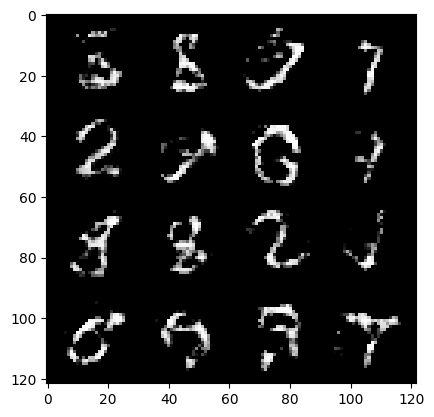

  0%|          | 0/469 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999996..0.6441337].


Epoch: 1 | Discriminator_loss 0.6040533937370853 | Generatorr_loss 0.8316694996250209


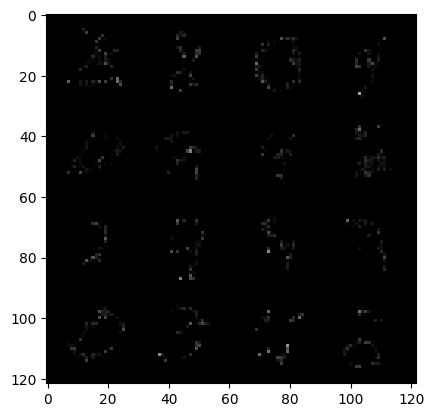

  0%|          | 0/469 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.69440484].


Epoch: 2 | Discriminator_loss 0.618263117794289 | Generatorr_loss 0.8373416902414009


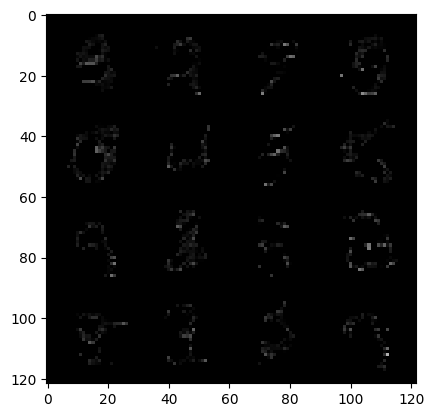

  0%|          | 0/469 [00:00<?, ?it/s]

In [ ]:
for epoch in range(epochs):
    total_discriminator_loss = 0.0
    total_generator_loss = 0.0

    for real_image, real_label in tqdm(train_loader):

        real_image = real_image.to(device) 
        
        # find loss and update weights for Discriminator

        D_optim.zero_grad()

        random_noise = torch.randn(batch_size, noise_dim, device = device) #the shape will be reshaped by the Generator internally
        fake_image = G(random_noise) #from the random noise we create fake image

        discriminator_predictions = D(fake_image)
        D_fake_loss = fake_loss(discriminator_predictions)

        discriminator_predictions = D(real_image)
        D_real_loss = real_loss(discriminator_predictions)

        D_loss = (D_fake_loss + D_real_loss)/2
        D_loss.backward()
        D_optim.step()

        total_discriminator_loss += D_loss.item()
        
        # find loss and update weights for Generator

        G_optim.zero_grad()

        random_noise = torch.randn(batch_size, noise_dim, device = device) #the shape will be reshaped by the Generator internally
        fake_image = G(random_noise) #from the random noise we create fake image
        
        discriminator_predictions = D(fake_image)
        G_loss = real_loss(discriminator_predictions)

        G_loss.backward()
        G_optim.step()

        total_generator_loss += G_loss.item()
    
    avg_discriminator_loss, avg_generator_loss = total_discriminator_loss / len(train_loader), total_generator_loss / len(train_loader)

    print(f'Epoch: {epoch+1} | Discriminator_loss {avg_discriminator_loss} | Generatorr_loss {avg_generator_loss}')

    show_tensor_images(fake_image)

        
